**Sentiment Analysis**

Streaming output truncated to the last 5000 lines.
Text: aman ayesha brigade and amritsarlahore pappi zhappi gang and assorted idiots like barkha and sudeen kulkarni will feel devastated this but this the sentiment indians and modi knows the pulse the common man | Score: -0.1901
Text: saale rahul baba you dont have any points for this electionyou please check the activities done led your government ruled for more than long years who couldnt solve poverty issue and pointing towards | Score: 0.5283
Text: you have reply the video where modi clearly states will bring back black money and give people gift wheres that gift instead you talk about already existent tax cuts and gst all things remember puducherry vanakkam | Score: 0.743
Text: why modi even there that list | Score: 0.0
Text: imran has taught modi lesson life timebut dont trust the cunning hindutva | Score: -0.4023
Text: very shameful have leader like modi begairat not small kid like you who need leader | Score: -0.4772
Text: west

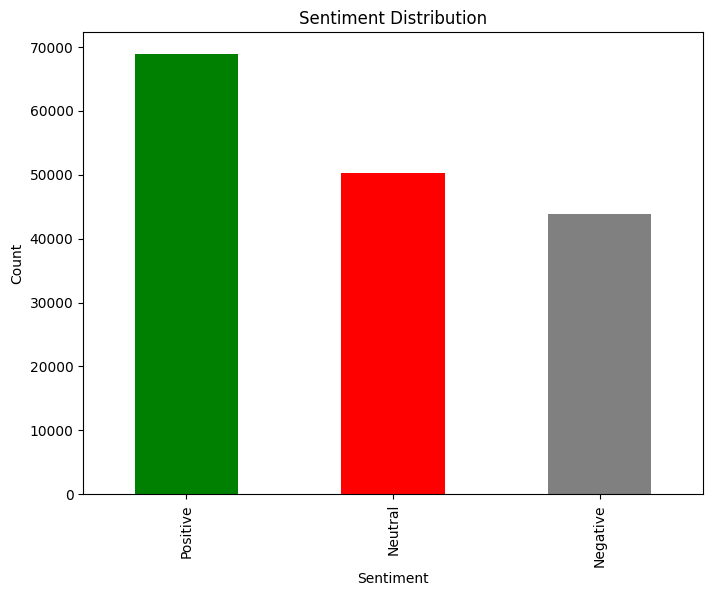

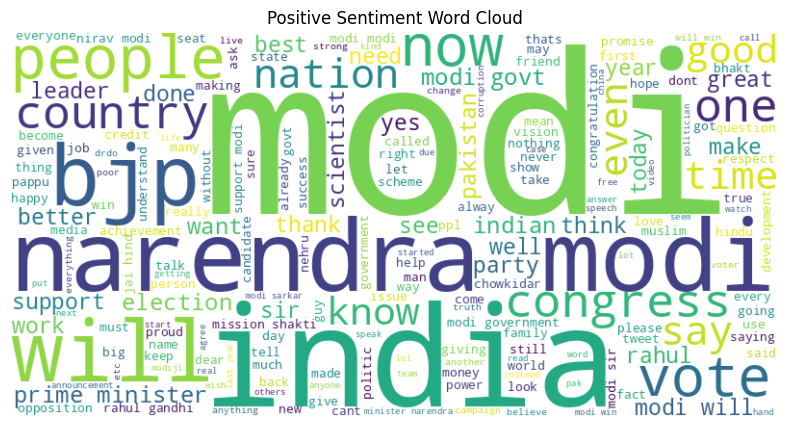


Enter multiple tweets (one per line). Type 'exit' on a new line to finish:

"Great job on the project, team! 🚀🔥"
did some people say modi looking defensive these days
Woke up feeling sick today. Hate this. 😞💔"
I need to go grocery shopping later.
exit
Text: "Great job on the project, team! 🚀🔥" | Score: 1.3574000000000002
Text: did some people say modi looking defensive these days | Score: 0.0258
Text: Woke up feeling sick today. Hate this. 😞💔" | Score: -1.1412
Text: I need to go grocery shopping later. | Score: 0.0

Predicted Sentiments:
Tweet: "Great job on the project, team! 🚀🔥"
Sentiment: Positive

Tweet: did some people say modi looking defensive these days
Sentiment: Neutral

Tweet: Woke up feeling sick today. Hate this. 😞💔"
Sentiment: Negative

Tweet: I need to go grocery shopping later.
Sentiment: Neutral



In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load dataset
df = pd.read_csv("Twitter_Data.csv")

# Assuming the column containing the text data is named 'clean_text'
text_column_name = "clean_text"

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Apply text cleaning
df["cleaned_text"] = df[text_column_name].astype(str).apply(clean_text)

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a dictionary to store emoji sentiments
emoji_sentiment = {
    "🔥": 0.5,   # Adjusted sentiment weight
    "💖": 0.5,
    "🚀": 0.4,
    "😃": 0.3,
    "💪": 0.3,
    "💀": -0.4,
    "🤬": -0.5,
    "👎": -0.3,
    "💔": -0.3,
    "😡": -0.3,
    "😐": 0.0,   # Neutral
    "🤔": 0.0,
    "🤷‍♂️": 0.0
}

# Function to get sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]

    # Check for emojis and adjust score
    for emoji, sentiment_score in emoji_sentiment.items():
        if emoji in text:
            score += sentiment_score

    print(f"Text: {text} | Score: {score}")  # Debugging output

    # Adjusted thresholds for better Neutral detection
    if score > 0.2:
        return "Positive"
    elif score < -0.2:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to all tweets
df["Sentiment"] = df["cleaned_text"].apply(get_sentiment)

# Display sentiment counts
print(df["Sentiment"].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
df["Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Generate Word Cloud for positive tweets
positive_text = " ".join(df[df["Sentiment"] == "Positive"]["cleaned_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
print("\n")
plt.show()

# **Predict sentiment for multiple user inputs**
print("\nEnter multiple tweets (one per line). Type 'exit' on a new line to finish:\n")
user_inputs = []
while True:
    user_text = input()
    if user_text.lower() == "exit":
        break
    user_inputs.append(user_text)

# Process and analyze sentiments for all inputs
if user_inputs:
    cleaned_inputs = [clean_text(text) for text in user_inputs]
    sentiments = [get_sentiment(text) for text in cleaned_inputs]

    print("\nPredicted Sentiments:")
    for text, sentiment in zip(user_inputs, sentiments):
        print(f"Tweet: {text}\nSentiment: {sentiment}\n")